# **Breast Cancer Prediction Using Logistic Regression**

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

## **Importing Dataset**

In [2]:
data = pd.read_csv ("/content/drive/MyDrive/TEC/Cuadernos Machine Learning/breast_cancer.csv")

## **Creating DataFrame**

In [3]:
df = pd.DataFrame (data)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## **Data shape and information**

In [4]:
print ("Shape of data {}" . format (df.shape))
print ("Number of rows: {}" . format (df.shape [0]))
print ("Number of columns: {}" . format (df.shape [1]))

Shape of data (683, 10)
Number of rows: 683
Number of columns: 10


In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [6]:
df.describe ()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

## **Checking for missing values**

In [8]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## **Selecting features**

Select the features you would like to work on (put the names of the columns in brackets)

In [21]:
X = pd.DataFrame (data , columns = ["Clump Thickness" ,
                                    "Uniformity of Cell Size" ,
                                    "Uniformity of Cell Shape" ,
                                    "Marginal Adhesion",
                                    "Single Epithelial Cell Size" ,
                                    "Bare Nuclei",
                                    "Bland Chromatin",
                                    "Normal Nucleoli",
                                    "Mitoses"]) # Features

y = data.Class # Target variables

(array([444.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 239.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

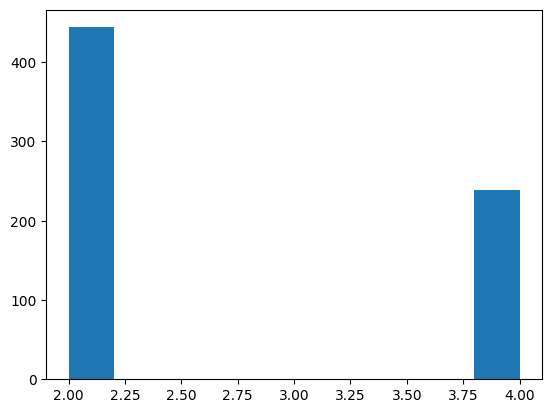

In [22]:
plt.hist (y)

In [23]:
((y == 2).sum ()/len (y)) * 100

65.00732064421669

## **Split X and y into training and testing sets**

In [24]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.25 , random_state = 0)

In [25]:
X_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
556,7,6,10,5,3,10,9,10,2
66,8,3,8,3,4,9,8,9,8
571,8,10,10,10,6,10,10,10,1
299,1,1,1,1,2,1,1,1,1
355,1,1,3,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...
9,4,2,1,1,2,1,2,1,1
359,5,1,1,2,2,1,2,1,1
192,1,1,1,1,2,1,1,1,1
629,3,1,1,1,2,1,2,1,1


## **Training**

In [26]:
logreg = LogisticRegression (solver = "liblinear")

logreg.fit (X_train , y_train)                     # Fitting a  model

LogisticRegression(solver='liblinear')

## **Predicting**

In [27]:
y_pred = logreg.predict(X_test)                    # Predicted class labels from test features
y_predicted_proba = logreg.predict_proba(X_test)   # Predicted probabilities from test features

In [28]:
print ("Accuracy: " , metrics.accuracy_score (y_test , y_pred))

Accuracy:  0.9298245614035088


In [29]:
logreg.intercept_

array([-5.70554465])

In [30]:
logreg.coef_

array([[0.13835745, 0.31069278, 0.19825344, 0.10998023, 0.03257786,
        0.39283874, 0.07070184, 0.22314948, 0.04977881]])

### **Prediction probability**

In [31]:
logreg.predict_proba(X)

array([[0.96928485, 0.03071515],
       [0.08042812, 0.91957188],
       [0.96563273, 0.03436727],
       ...,
       [0.00893438, 0.99106562],
       [0.06136128, 0.93863872],
       [0.0386699 , 0.9613301 ]])

### **Class prediction**

In [32]:
logreg.predict(X)

array([2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

### **Score**

In [33]:
logreg.score(X,y)

0.9648609077598829

## **Confusion Matrix**

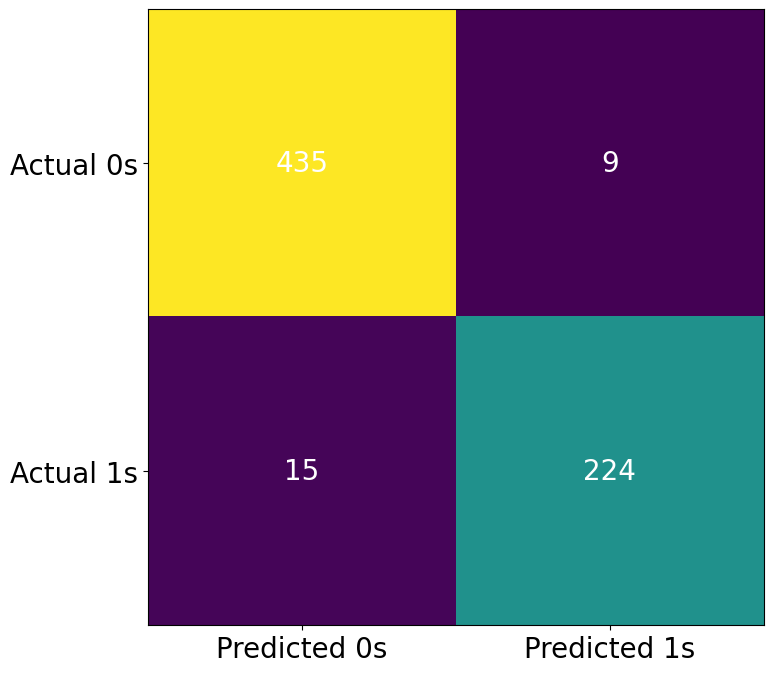

In [34]:
cm = confusion_matrix (y , logreg.predict(X))

fig , ax = plt.subplots (figsize = (8,8))
ax.imshow (cm)
ax.grid (False)
ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("Predicted 0s" , "Predicted 1s"))
ax.yaxis.set (ticks = (0 , 1) , ticklabels = ("Actual 0s" , "Actual 1s"))

ax.tick_params(axis='both', which='major', labelsize=20)
#ax.tick_params(axis='both', which='minor', labelsize=20)
#plt.xticks(fontsize=14, rotation=90)

ax.set_ylim (1.5 , -0.5)
for i in range (2):
    for j in range (2):
        ax.text (j , i , cm[i,j] , ha = "center" , va ="center" , color ="white", fontsize = 20 )
plt.show()

## **Classification Report**

In [35]:
print (classification_report (y , logreg.predict (X)))

              precision    recall  f1-score   support

           2       0.97      0.98      0.97       444
           4       0.96      0.94      0.95       239

    accuracy                           0.96       683
   macro avg       0.96      0.96      0.96       683
weighted avg       0.96      0.96      0.96       683



## **Inference**

In [45]:
prueba = pd.DataFrame ({"Clump Thickness": [7],
                        "Uniformity of Cell Size": [6] ,
                        "Uniformity of Cell Shape": [10] ,
                        "Marginal Adhesion": [5],
                        "Single Epithelial Cell Size": [3],
                        "Bare Nuclei": [10],
                        "Bland Chromatin": [9],
                        "Normal Nucleoli": [10],
                        "Mitoses": [2]})
prueba

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,7,6,10,5,3,10,9,10,2


In [47]:
prediccion = logreg.predict(prueba)
prediccion

if(prediccion[0]==2):
  print("Diagnóstico: healthy")
elif(prediccion[0]==4):
  print("Diagnóstico: breast cancer")
else:
  print("Error de predicción")


Diagnóstico: breast cancer
